IMPORTING LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

In [ ]:
google_drive_link = 'https://drive.google.com/uc?export=download&id=1r5b0aQ_uqxoXxIX89f4bKAlLc6nkogZS'

In [ ]:
dataset = pd.read_csv(google_drive_link)


In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
dataset.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
dataset=dataset[:-1]

In [ ]:
dataset.isnull().sum()

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,502


<Axes: >

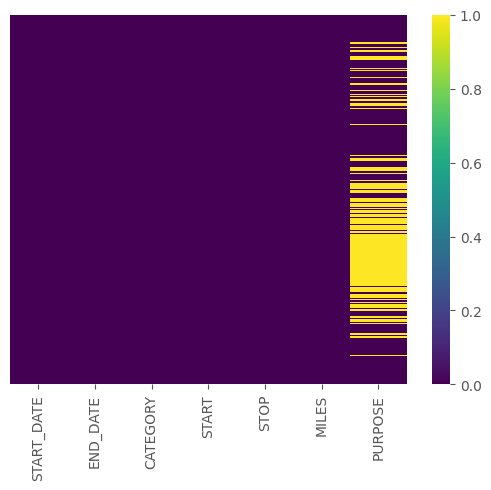

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap="viridis")

<Axes: >

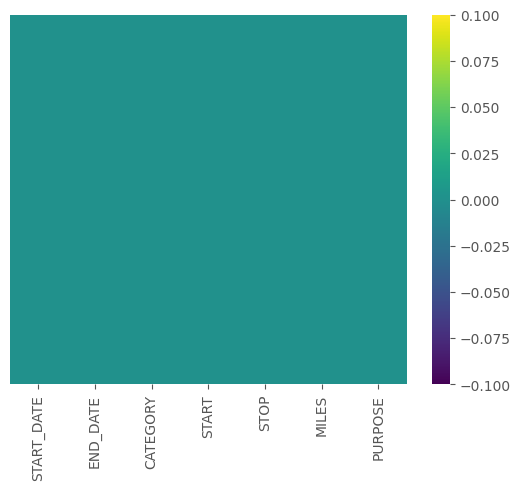

In [ ]:
dataset=dataset.dropna()
sns.heatmap(dataset.isnull(),yticklabels=False,cmap="viridis")

In [ ]:
print(dataset.columns)


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


In [ ]:
from logging import error
import pandas as pd

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'] , errors = 'coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'] , errors = 'coerce')

In [ ]:
dataset.dropna(subset=['START_DATE'], inplace=True)

In [ ]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in dataset['START_DATE']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
dataset['HOUR']=hour
dataset['DAY']=day
dataset['DAY_OF_WEEK']=dayofweek
dataset['MONTH']=month
dataset['WEEKDAY']=weekday

In [ ]:
time=[]
dataset['TRAVEL_TIME']=dataset['END_DATE']-dataset['START_DATE']
for i in dataset['TRAVEL_TIME']:
    time.append(i.seconds/60)
dataset['TRAVEL_TIME']=time
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVEL_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


In [ ]:
dataset['TRAVEL_TIME']=dataset['TRAVEL_TIME']/60
dataset['SPEED']=dataset['MILES']/dataset['TRAVEL_TIME']
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVEL_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.001667,3060.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.003611,1329.230769
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.003889,1208.571429
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,0.018611,3422.686567
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.001111,3870.000000


In [ ]:
dataset.describe()


,START_DATE,END_DATE,MILES,HOUR,DAY,DAY_OF_WEEK,MONTH,TRAVEL_TIME,SPEED
count,261,261,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2016-06-01 16:09:56.091954176,2016-06-01 16:31:09.425287168,10.314559,15.042146,6.452107,2.992337,5.819923,0.005895,1553.622552
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000,1.000000,0.000000,1.000000,0.000556,420.000000
25%,2016-03-04 11:46:00,2016-03-04 12:06:00,3.300000,12.000000,4.000000,1.000000,3.000000,0.003056,1080.000000
50%,2016-05-10 09:03:00,2016-05-10 09:20:00,6.900000,15.000000,6.000000,3.000000,5.000000,0.004722,1360.000000
75%,2016-07-06 23:46:00,2016-07-06 23:59:00,10.400000,19.000000,10.000000,4.000000,7.000000,0.006667,1778.823529
max,2016-12-12 20:48:00,2016-12-12 20:57:00,174.200000,23.000000,12.000000,6.000000,12.000000,0.049444,7128.000000
std,NaN,NaN,18.642603,5.097713,3.510781,1.972878,3.611167,0.005647,849.703244


In [ ]:
def convert_time(column_name):
    y=[]
    for x in dataset[column_name]:
        y.append(datetime.datetime.strptime('1/1/2016 21:11', "%m/%d/%Y %H:%M"))

    dataset[column_name] = y

In [ ]:
column_date=dataset[['START_DATE','END_DATE']]
for x in column_date:
    convert_time(x)

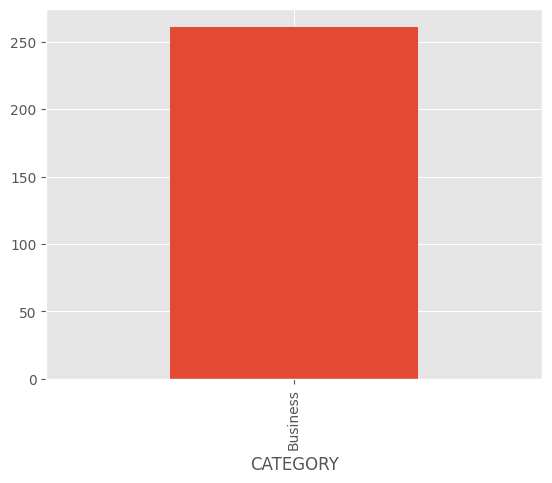

In [ ]:
x = dataset['CATEGORY'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

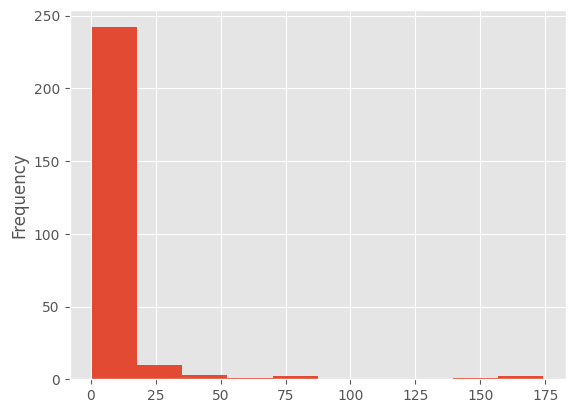

In [ ]:
dataset['MILES'].plot.hist()

<Axes: xlabel='PURPOSE'>

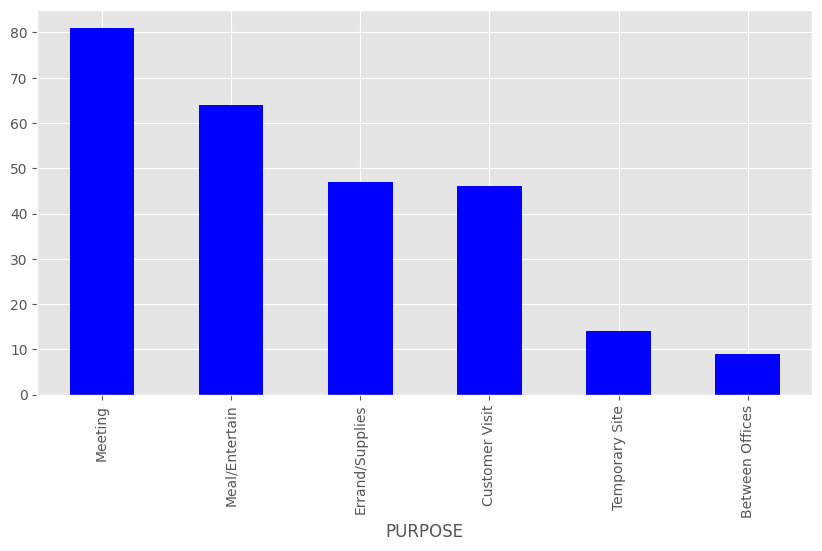

In [ ]:
dataset['PURPOSE'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

<Axes: xlabel='HOUR'>

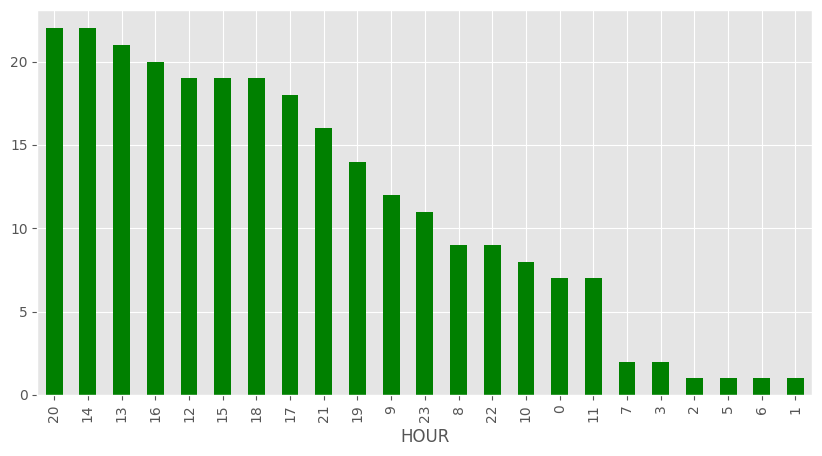

In [ ]:
dataset['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='green')


<Axes: xlabel='WEEKDAY'>

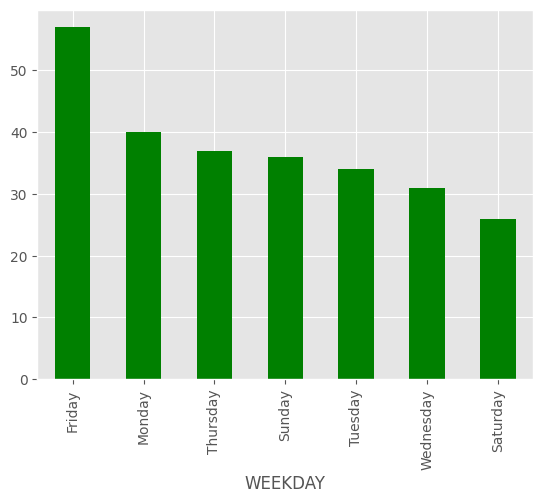

In [ ]:
dataset['WEEKDAY'].value_counts().plot(kind='bar',color='green')

<Axes: xlabel='DAY'>

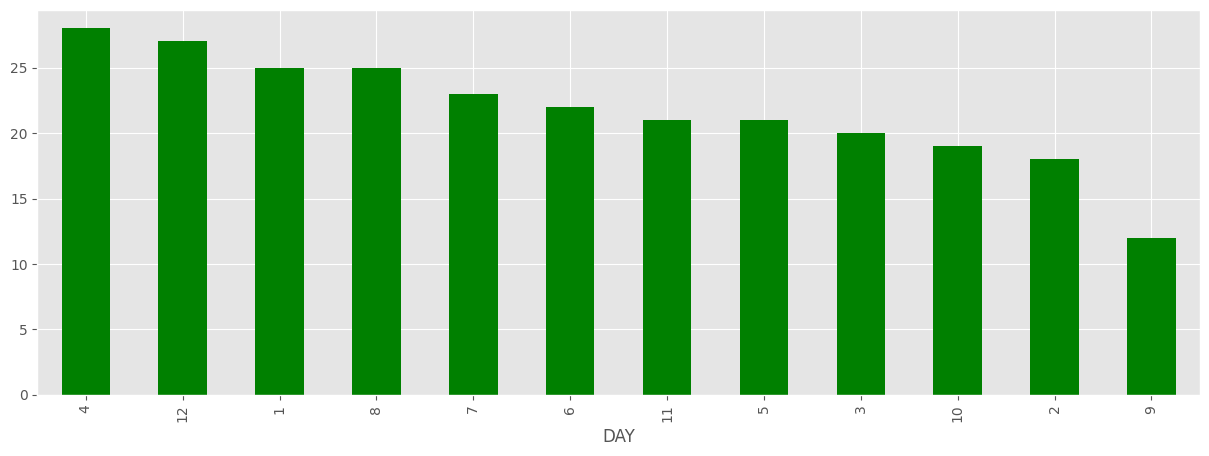

In [ ]:
dataset['DAY'].value_counts().plot(kind='bar',figsize=(15,5),color='green')

<Axes: xlabel='MONTH'>

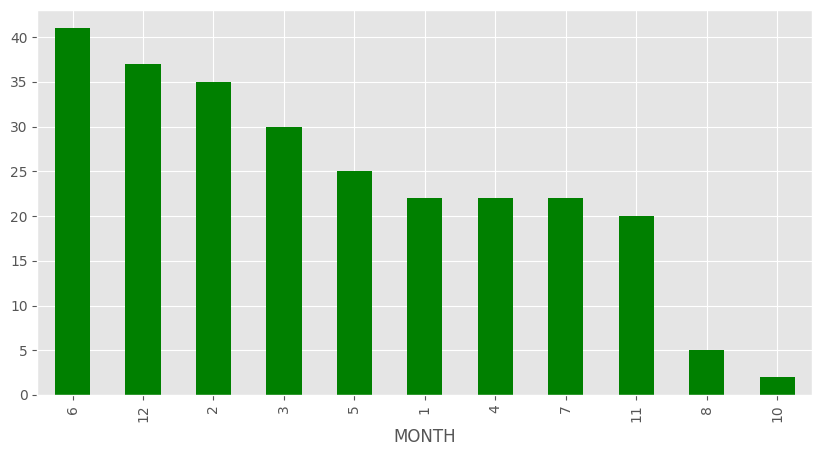

In [ ]:
dataset['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green')


<Axes: xlabel='START'>

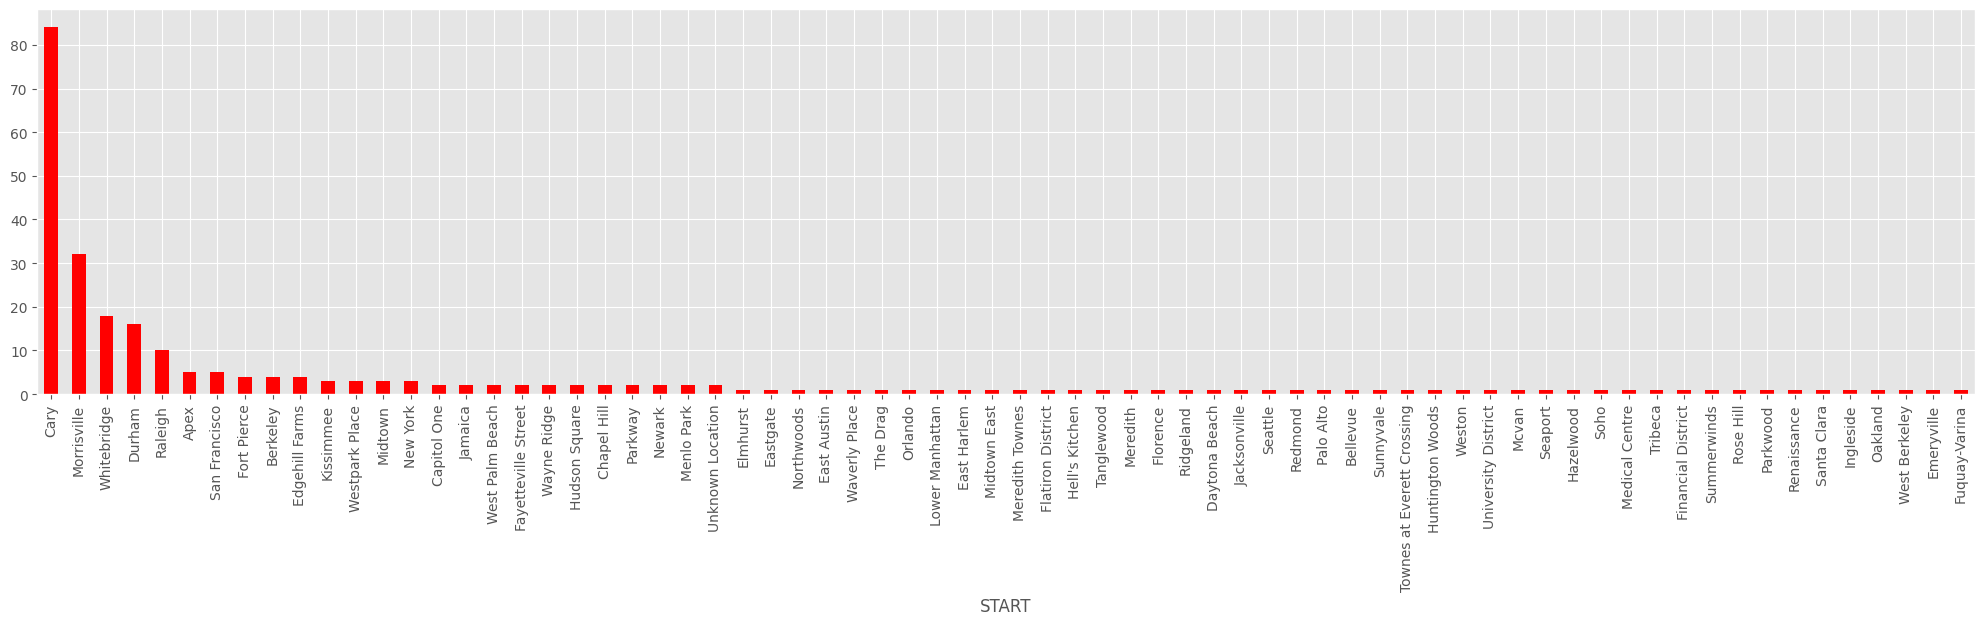

In [ ]:
dataset['START'].value_counts().plot(kind='bar',figsize=(25,5),color='red')

In [ ]:
numeric_dataset = dataset.select_dtypes(include=np.number)


<Axes: xlabel='PURPOSE'>

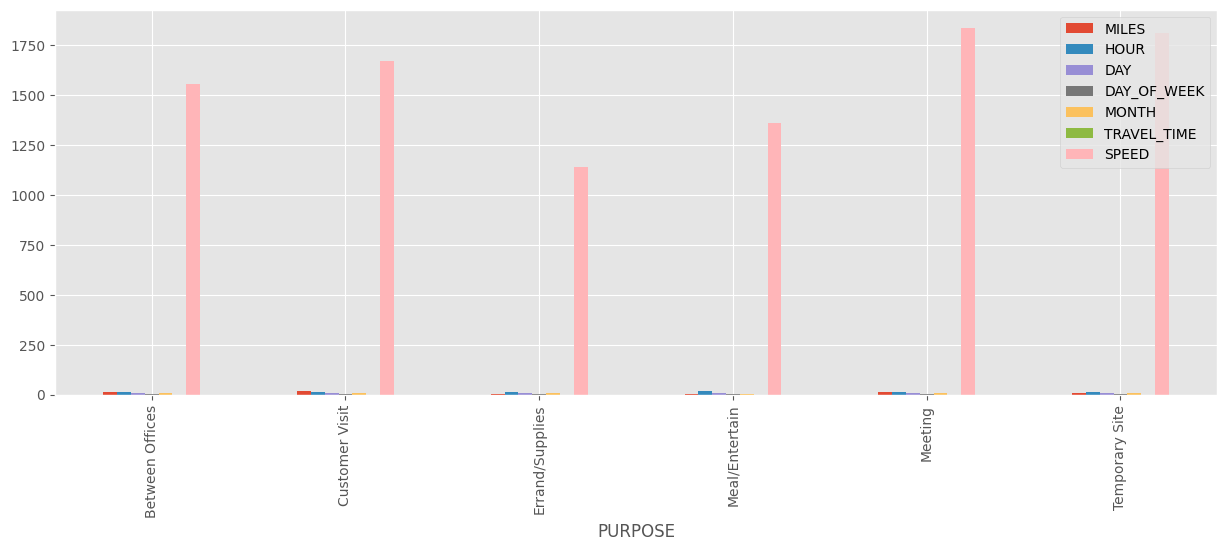

In [ ]:
dataset.groupby('PURPOSE')[numeric_dataset.columns].mean().plot(kind='bar',figsize=(15,5))
